## 1) Library & Data Import

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/Pokemon.csv")

In [4]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


-----

## 2) EDA 

In [5]:
df.shape

(800, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [7]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [8]:
df['Legendary'].value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [9]:
df['Generation'].value_counts()

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

<AxesSubplot:>

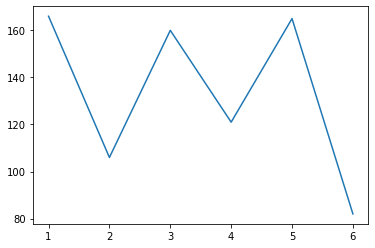

In [10]:
df['Generation'].value_counts().sort_index().plot()

In [11]:
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [12]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Ground', 'Fairy', 'Grass',
       'Fighting', 'Psychic', 'Steel', 'Ice', 'Rock', 'Dark', 'Water',
       'Electric', 'Fire', 'Ghost', 'Bug', 'Normal'], dtype=object)

In [13]:
len(df[df['Type 2'].notnull()]['Type 2'].unique())

18

-----

### 2-2) Explore data features

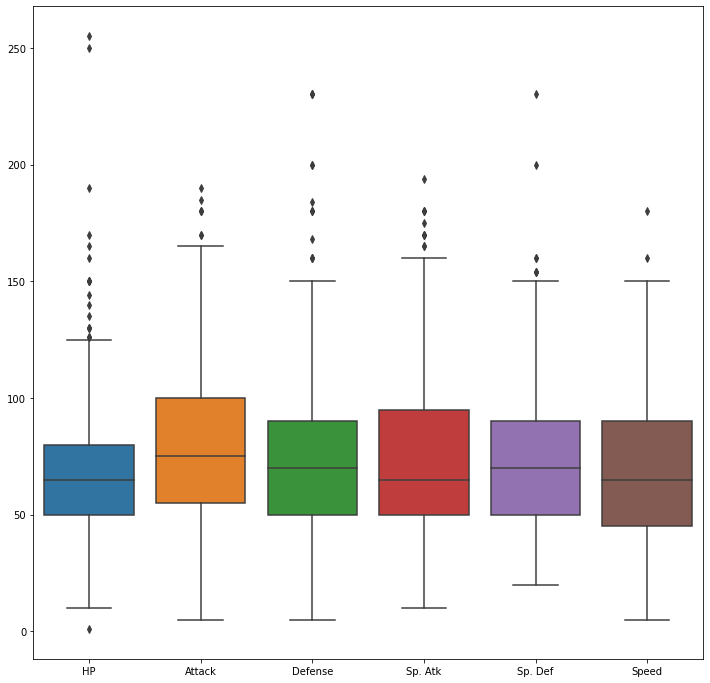

In [14]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(data = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax = ax)
plt.show()

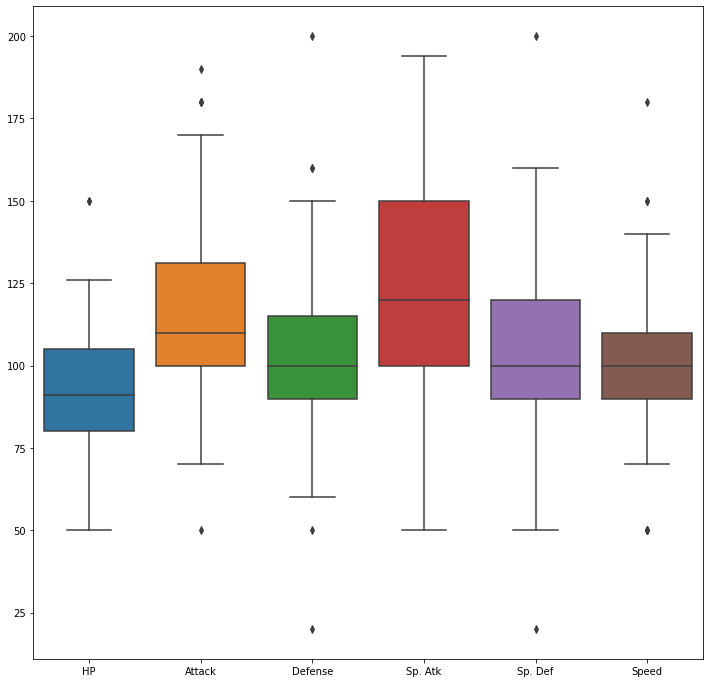

In [15]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(data =df[df['Legendary'] == 1][['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], ax = ax)
plt.show()

<AxesSubplot:>

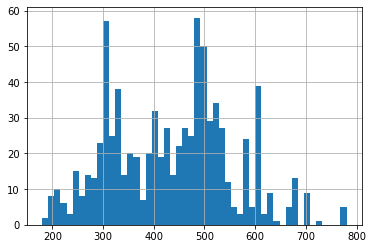

In [16]:
df['Total'].hist(bins = 50)

<AxesSubplot:>

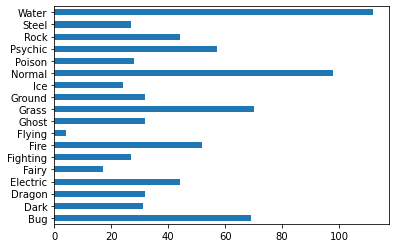

In [17]:
df['Type 1'].value_counts(sort = False).sort_index().plot.barh()

<AxesSubplot:>

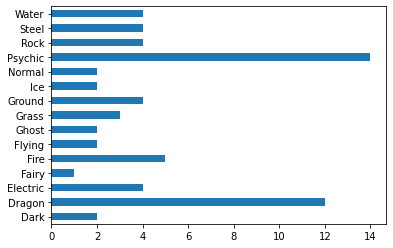

In [18]:
df[df['Legendary'] == 1]['Type 1'].value_counts(sort = False).sort_index().plot.barh()

<AxesSubplot:>

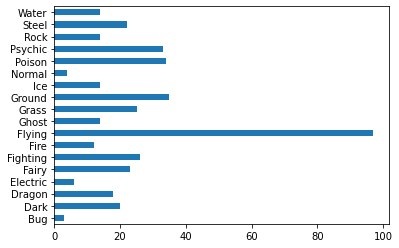

In [19]:
df['Type 2'].value_counts(sort = False).sort_index().plot.barh()

<AxesSubplot:>

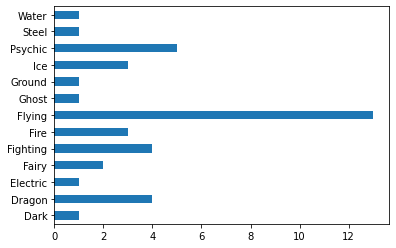

In [20]:
df[df['Legendary'] == 1]['Type 2'].value_counts(sort = False).sort_index().plot.barh()

<AxesSubplot:>

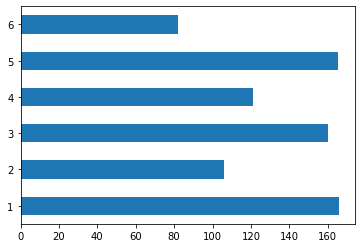

In [21]:
df['Generation'].value_counts(sort = False).sort_index().plot.barh()

<AxesSubplot:>

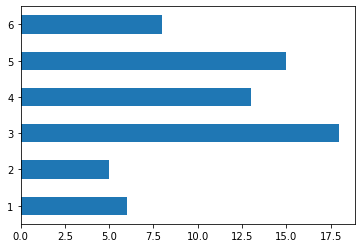

In [22]:
df[df['Legendary'] == 1]['Generation'].value_counts(sort = False).sort_index().plot.barh()

<AxesSubplot:xlabel='Generation'>

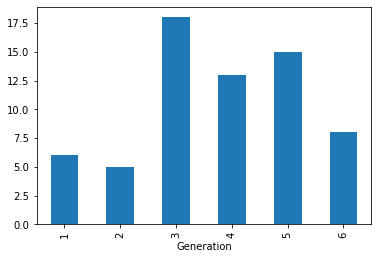

In [23]:
groups = df[df['Legendary'] == 1].groupby('Generation').size()
groups.plot.bar()

#### Exploring the distribution of Pokemon abilities

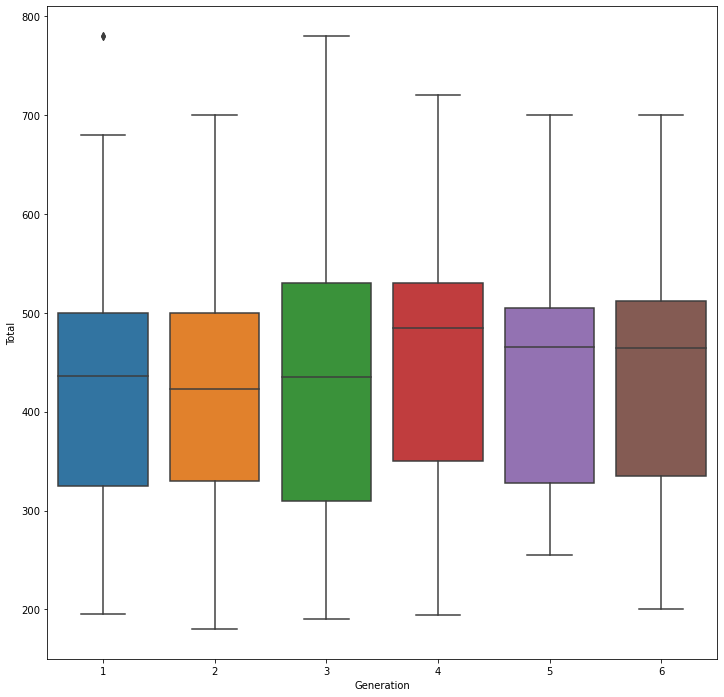

In [24]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'Generation', y = 'Total', data = df, ax = ax)
plt.show()

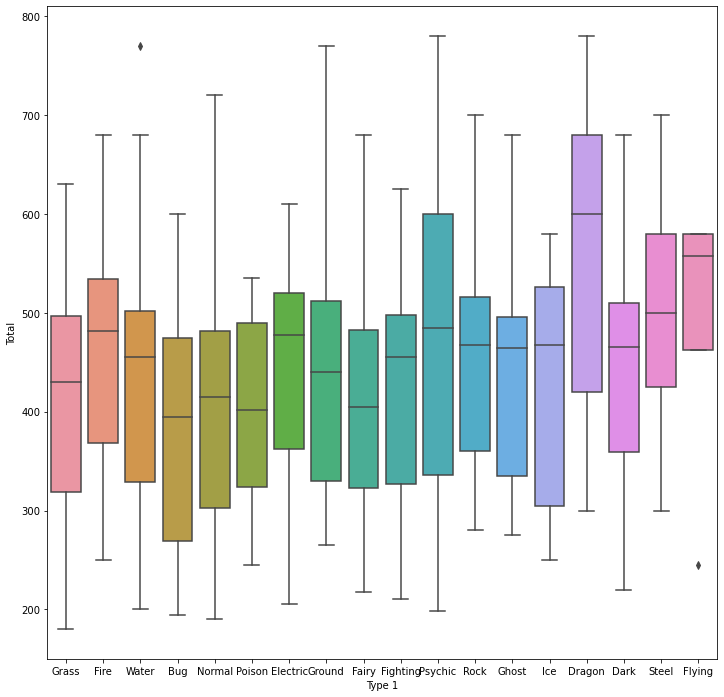

In [25]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = 'Type 1', y = 'Total', data = df, ax = ax)
plt.show()

-----

## 3) Supervised learning-based classification analysis

### 3-1) Data preprocessing

##### Change data type

In [26]:
df['Legendary'] = df['Legendary'].astype(int)
df['Generation'] = df['Generation'].astype(str)
preprocessed_df = df[['Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary']]

In [27]:
preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,0
1,Grass,Poison,405,60,62,63,80,80,60,1,0
2,Grass,Poison,525,80,82,83,100,100,80,1,0
3,Grass,Poison,625,80,100,123,122,120,80,1,0
4,Fire,NaN,309,39,52,43,60,50,65,1,0


-----

##### one-hot encoding

In [28]:
encoded_df = pd.get_dummies(preprocessed_df['Type 1'])
encoded_df.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [29]:
# make type list
def make_list(x1 ,x2):
    type_list = []
    type_list.append(x1)
    if x2 is not np.nan:
        type_list.append(x2)
    return type_list

preprocessed_df['Type'] = preprocessed_df.apply(lambda x : make_list(x['Type 1'], x['Type 2']), axis = 1)
preprocessed_df.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,Grass,Poison,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,Grass,Poison,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,Grass,Poison,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,Grass,Poison,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,Fire,NaN,309,39,52,43,60,50,65,1,0,[Fire]


In [30]:
del preprocessed_df['Type 1']
del preprocessed_df['Type 2']

In [31]:
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type
0,318,45,49,49,65,65,45,1,0,"[Grass, Poison]"
1,405,60,62,63,80,80,60,1,0,"[Grass, Poison]"
2,525,80,82,83,100,100,80,1,0,"[Grass, Poison]"
3,625,80,100,123,122,120,80,1,0,"[Grass, Poison]"
4,309,39,52,43,60,50,65,1,0,[Fire]


----

In [32]:
from sklearn.preprocessing import MultiLabelBinarizer

In [33]:
mlb = MultiLabelBinarizer()
preprocessed_df = preprocessed_df.join(pd.DataFrame(mlb.fit_transform(preprocessed_df.pop('Type')), columns = mlb.classes_))

In [34]:
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Bug,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,318,45,49,49,65,65,45,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,625,80,100,123,122,120,80,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,309,39,52,43,60,50,65,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
preprocessed_df = pd.get_dummies(preprocessed_df)
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,318,45,49,49,65,65,45,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,405,60,62,63,80,80,60,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,525,80,82,83,100,100,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,625,80,100,123,122,120,80,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,309,39,52,43,60,50,65,0,0,0,...,0,0,0,0,1,0,0,0,0,0


##### Feature standardization

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()
scale_columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
preprocessed_df[scale_columns] = scaler.fit_transform(preprocessed_df[scale_columns])
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Psychic,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
X = preprocessed_df.loc[:, preprocessed_df.columns != 'Legendary']
y = preprocessed_df['Legendary']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 33)

In [39]:
X_train.shape, X_test.shape

((600, 31), (200, 31))

-----

### 3-2) Logistic Regression 

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [41]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [42]:
y_pred = lr.predict(X_test)

In [43]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.955
0.6153846153846154
0.6666666666666666
0.64


In [44]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[183   5]
 [  4   8]]


-----

### 3-3) Class imbalance adjustment

In [45]:
preprocessed_df['Legendary'].value_counts()

0    735
1     65
Name: Legendary, dtype: int64

##### 1:1 sampling

In [46]:
positive_random_index = preprocessed_df[preprocessed_df['Legendary'] == 1].sample(65, random_state = 33).index.tolist()
negative_random_index = preprocessed_df[preprocessed_df['Legendary'] == 0].sample(65, random_state = 33).index.tolist()

In [47]:
random_idx = positive_random_index + negative_random_index

X = preprocessed_df.loc[random_idx, preprocessed_df.columns != 'Legendary']
y = preprocessed_df['Legendary'][random_idx]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 33)

In [48]:
X_train.shape, X_test.shape

((97, 31), (33, 31))

In [49]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [50]:
y_pred = lr.predict(X_test)

In [51]:
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.9696969696969697
0.9230769230769231
1.0
0.9600000000000001


In [52]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix(y_true = y_test, y_pred = y_pred)
print(confmat)

[[20  1]
 [ 0 12]]


## 4) Cluster classification analysis based on unsupervised learning

### 4-1) Kmeans

##### 2-D Cluster Analysis (Kmeans)

In [54]:
from sklearn.cluster import KMeans

k: 1 | cost: 1599.9999999999998
k: 2 | cost: 853.3477298974243
k: 3 | cost: 642.310401639615
k: 4 | cost: 480.49450250321513
k: 5 | cost: 403.8390696550314


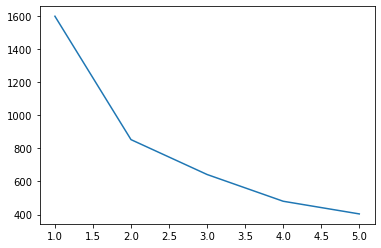

In [56]:
X = preprocessed_df[['Attack', 'Defense']]

k_list = []
cost_list = []
for k in range(1,6):
    kmeans = KMeans(n_clusters = k).fit(X)
    inertia = kmeans.inertia_
    print('k:', k, '| cost:', inertia)
    k_list.append(k)
    cost_list.append(inertia)
    
plt.plot(k_list, cost_list)
    

In [63]:
kmeans = KMeans(n_clusters = 4).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,2
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,2
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [65]:
print(preprocessed_df['cluster_num'].value_counts())

2    309
1    253
3    128
0    110
Name: cluster_num, dtype: int64


##### Cluster visualization

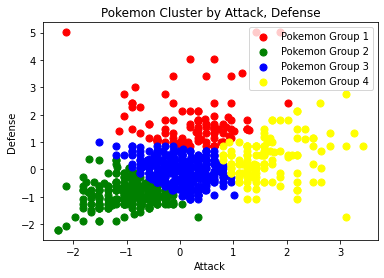

In [67]:
# Visualization
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 0]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 0]['Defense'], 
            s = 50, c = 'red', label = 'Pokemon Group 1')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 1]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 1]['Defense'], 
            s = 50, c = 'green', label = 'Pokemon Group 2')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 2]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 2]['Defense'], 
            s = 50, c = 'blue', label = 'Pokemon Group 3')
plt.scatter(preprocessed_df[preprocessed_df['cluster_num'] == 3]['Attack'], 
            preprocessed_df[preprocessed_df['cluster_num'] == 3]['Defense'], 
            s = 50, c = 'yellow', label = 'Pokemon Group 4')
plt.title('Pokemon Cluster by Attack, Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

##### Multidimensional Cluster Analysis (Kmeans)

k: 1 | cost: 4799.999999999997
k: 2 | cost: 3275.3812330305987
k: 3 | cost: 2862.177290379439
k: 4 | cost: 2566.7760221182552
k: 5 | cost: 2328.181090934398
k: 6 | cost: 2181.2276997543813
k: 7 | cost: 2061.156324293113
k: 8 | cost: 1959.59645118871
k: 9 | cost: 1858.875884725915
k: 10 | cost: 1778.363327659496
k: 11 | cost: 1716.8504013806114
k: 12 | cost: 1657.8019627464134
k: 13 | cost: 1583.8896610770373
k: 14 | cost: 1526.6089686239015


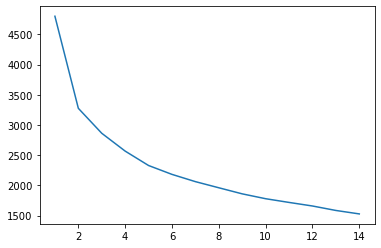

In [68]:
from sklearn.cluster import KMeans

# K-means train & Elbow method
X = preprocessed_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

k_list = []
cost_list = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k).fit(X)
    interia = kmeans.inertia_
    print ("k:", k, "| cost:", interia)
    k_list.append(k)
    cost_list.append(interia)
    
plt.plot(k_list, cost_list)

In [69]:
# selected by elbow method (5)
kmeans = KMeans(n_clusters=5).fit(X)
cluster_num = kmeans.predict(X)
cluster = pd.Series(cluster_num)
preprocessed_df['cluster_num'] = cluster.values
preprocessed_df.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Bug,Dark,...,Rock,Steel,Water,Generation_1,Generation_2,Generation_3,Generation_4,Generation_5,Generation_6,cluster_num
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,0,0,0,...,0,0,0,1,0,0,0,0,0,4
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,4
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,0,0,0,...,0,0,0,1,0,0,0,0,0,2
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,0,0,0,...,0,0,0,1,0,0,0,0,0,0


##### Visualize features by cluster

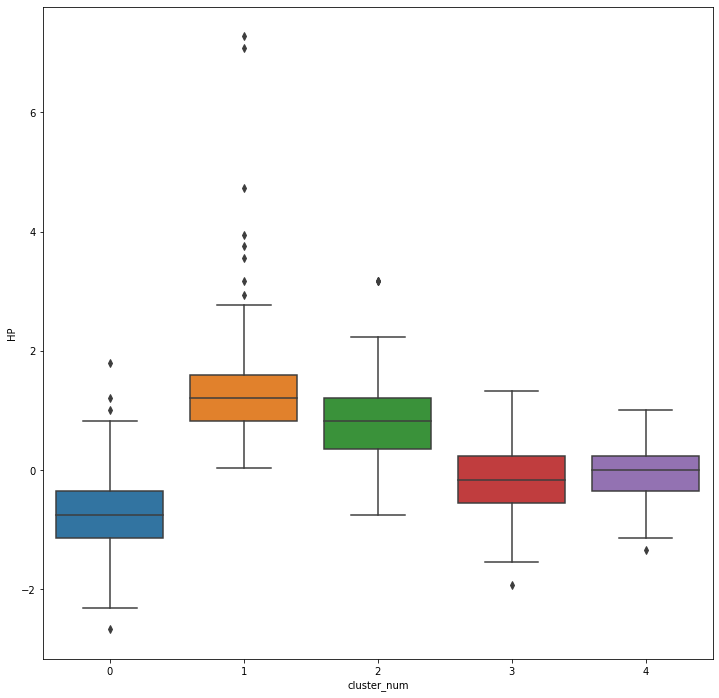

In [70]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "HP", data=preprocessed_df, ax=ax)
plt.show()

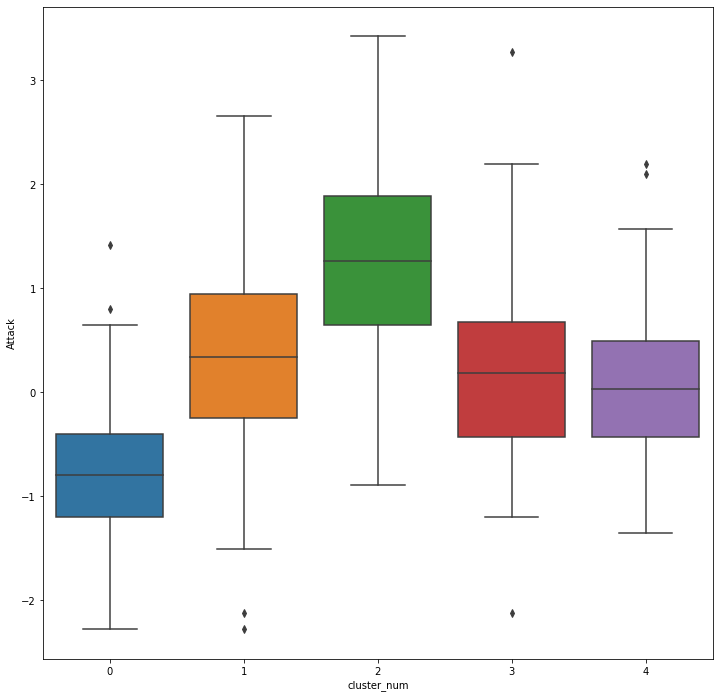

In [71]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Attack", data=preprocessed_df, ax=ax)
plt.show()

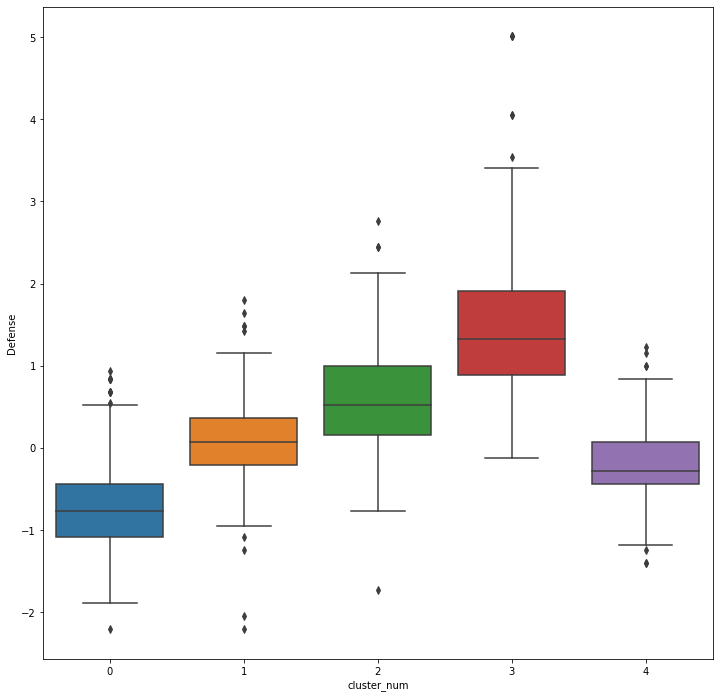

In [72]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Defense", data=preprocessed_df, ax=ax)
plt.show()

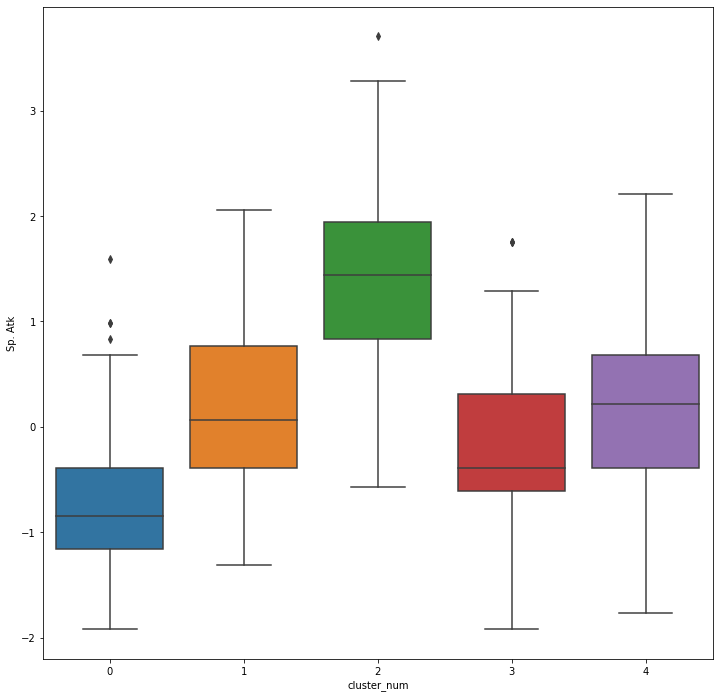

In [73]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Sp. Atk", data=preprocessed_df, ax=ax)
plt.show()

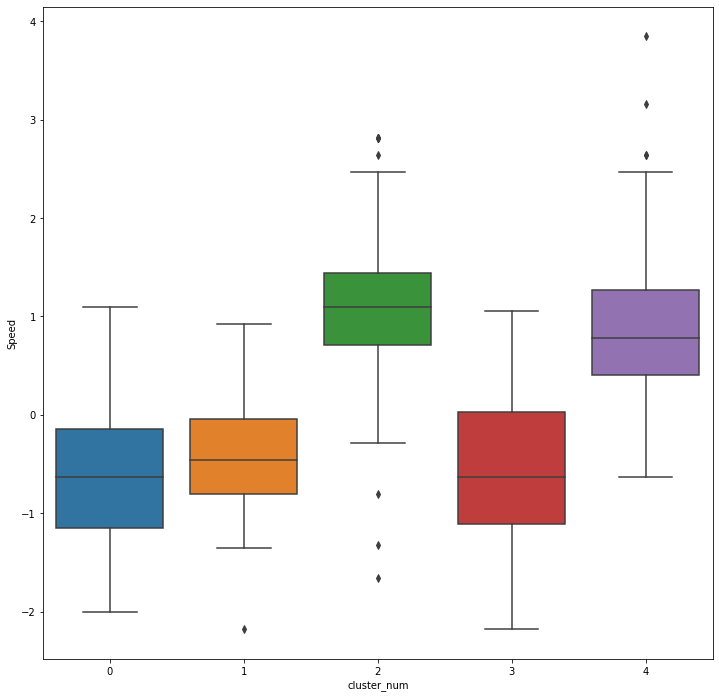

In [74]:
fig = plt.figure(figsize = (12, 12))
ax = fig.gca()
sns.boxplot(x = "cluster_num", y = "Speed", data=preprocessed_df, ax=ax)
plt.show()